#### Project: MNIST dataset

#### Programmer: Ricardo A. Leal

#### Date: 09/21/2020

#### Skills practiced in this project: Sequential, Dropout, Data Augmentation, classification report, EarlyStopping, Conv2D, Batch Normalization, MaxPooling

##### Note: 
Some of my features are processed in a similar way to what I have learn on different machine learning courses, books and websites. This is a basic project to get familiar with machine learning techniques.

In [ ]:
#Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#Extensions
%matplotlib inline

#Set seed to reproduce results
np.random.seed(33)
tf.random.set_seed(99)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Get data

In [ ]:
# Load data
mnist = tf.keras.datasets.mnist
#Split data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Explore data

In [ ]:
#Check data:

#Train set
print("X train: ", X_train.shape)
print("y train: ", y_train.shape)
#Test set
print("\nX test: ", X_test.shape)
print("y test: ", y_test.shape)

#Check data type
print("\nData type: ", type(X_train), X_train.dtype)

#Number of target classes
n_classes = len(np.unique(y_train))
print("\nNumber of target classes: ", n_classes)

#Target labels
target_labels = np.unique(y_train)
print("\nTarget labels:", target_labels)


X train:  (60000, 28, 28)
y train:  (60000,)

X test:  (10000, 28, 28)
y test:  (10000,)

Data type:  <class 'numpy.ndarray'> uint8

Number of target classes:  10

Target labels: [0 1 2 3 4 5 6 7 8 9]


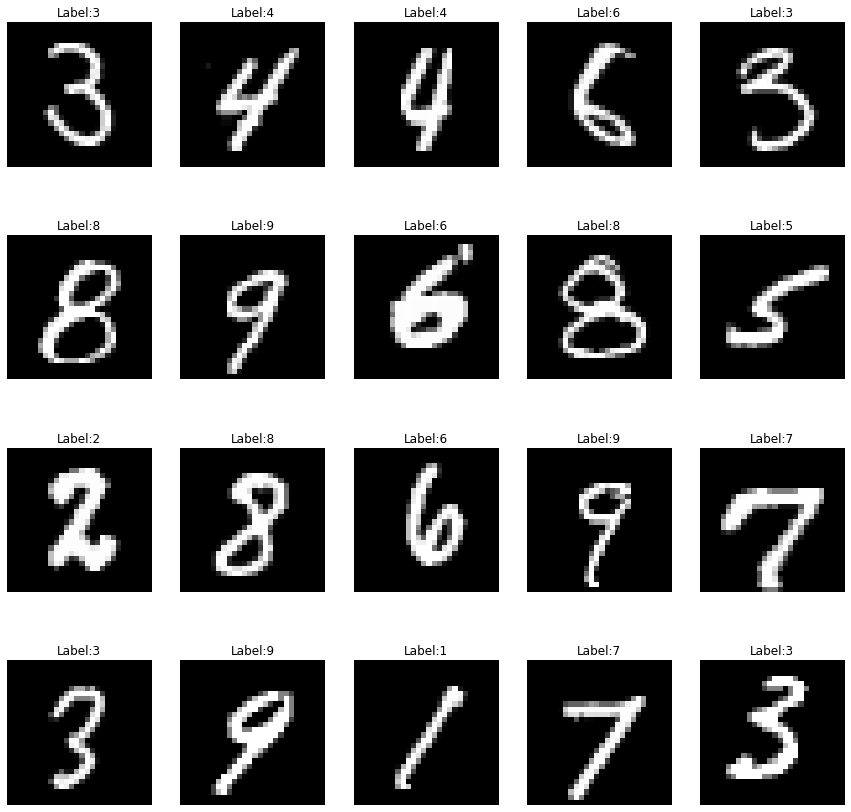

In [ ]:
#Display some samples and their labels

rows = 4
columns = 5

fig, axes = plt.subplots(rows, columns, figsize=(15,15))
axes = axes.ravel()

random_indexes = np.random.randint(low = 0, high = y_train.shape[0], size = rows*columns)

for index in range(0, rows*columns):
  axes[index].axis('off')
  axes[index].imshow(X_train[random_indexes[index]], cmap = 'gray')
  axes[index].set_title("Label:{}".format(y_train[random_indexes[index]]))

In [ ]:
#Reshape the data to (N, 28, 28, 1) to be able to fit it in the ImageDataGenerator
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#Input shape
input_shape = X_train.shape[1:]
print("\nInput shape: ", input_shape)


Input shape:  (28, 28, 1)


In [ ]:
#Scale data
X_train = X_train / 255.0
X_test =  X_test / 255.0

#Transform data type to float32
X_train = np.float32(X_train)
X_test = np.float32(X_test)

#Train test split to produce X val and y val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 846, stratify = y_train)

## Create models

## ANN model

In [ ]:
#Sequential model
ann_model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape = input_shape),
      tf.keras.layers.Dense(392, activation = 'relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(112, activation = 'relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(n_classes, activation = 'softmax')                                         
])

In [ ]:
#Compile model
ann_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## CNN model

In [ ]:
#Sequential model
cnn_model = tf.keras.models.Sequential([
                                               
      #Convolution 1                                         
      tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), activation = 'relu', 
                             padding = 'same', input_shape = input_shape),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), activation = 'relu', 
                             padding = 'same'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D((2,2)),

      #Convolution 2
      tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), activation = 'relu', 
                             padding = 'same'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), activation = 'relu', 
                             padding = 'same'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D((2,2)),

      #Flatten and Dense
      tf.keras.layers.Flatten(),      
      tf.keras.layers.Dense(392, activation = 'relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(112, activation = 'relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(n_classes, activation = 'softmax')                                         
])

In [ ]:
#Compile model
cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train models

In [ ]:
#Variables for training
batch_size = 32
epochs = 12

#Early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 4)

In [ ]:
'''
Function "get_augmented_data": 
Generates data using ImageDataGenerator
Parameter: X dataset, y dataset, any keyword paramater that can be inputted in tf.keras.preprocessing.image.ImageDataGenerator
Returns the augmented data
'''
def get_augmented_data(X, y, **kwargs):
  image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(kwargs)
  return image_data_generator.flow(X, y)

### Train ANN model

In [ ]:
#Train model
history = ann_model.fit(x = X_train, y = y_train, batch_size = batch_size, validation_data = (X_val, y_val),
                               epochs = epochs, callbacks = [early_stop])

Epoch 1/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9144 - val_loss: 0.1334 - val_accuracy: 0.9597
Epoch 2/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1347 - accuracy: 0.9589 - val_loss: 0.1075 - val_accuracy: 0.9677
Epoch 3/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1020 - accuracy: 0.9688 - val_loss: 0.0973 - val_accuracy: 0.9724
Epoch 4/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0825 - accuracy: 0.9756 - val_loss: 0.0897 - val_accuracy: 0.9762
Epoch 5/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0716 - accuracy: 0.9785 - val_loss: 0.0871 - val_accuracy: 0.9755
Epoch 6/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0641 - accuracy: 0.9798 - val_loss: 0.0846 - val_accuracy: 0.9770
Epoch 7/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0563 - accuracy: 0.9824 - val_loss: 0.0865 - val_accuracy:

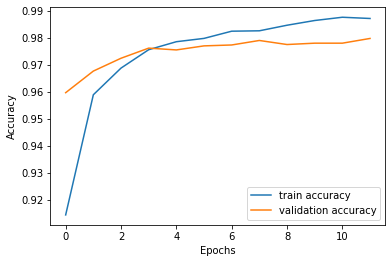

In [ ]:
#Plot accuracy
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(loc = 'lower right')

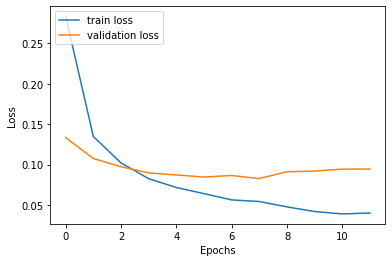

In [ ]:
#Plot loss
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(loc = 'upper left')

#### Data Augmentation

In [ ]:
#Get augmented data
augmented_data = get_augmented_data(X_train, y_train, zoom_range = 0.2)

#Fit augmented data
history = ann_model.fit(augmented_data, validation_data = (X_val, y_val), steps_per_epoch = (X_train.shape[0]//batch_size),
                    validation_steps = (X_val.shape[0]//batch_size), epochs = epochs, batch_size = batch_size, callbacks = [early_stop])

Epoch 1/12
   1/1500 [..............................] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1500/1500 [==============================] - 5s 3ms/step - loss: 0.0351 - accuracy: 0.9884 - val_loss: 0.0927 - val_accuracy: 0.9795
Epoch 2/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0338 - accuracy: 0.9889 - val_loss: 0.0923 - val_accuracy: 0.9792
Epoch 3/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0331 - accuracy: 0.9890 - val_loss: 0.0929 - val_accuracy: 0.9804
Epoch 4/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.1049 - val_accuracy: 0.9779
Epoch 5/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0961 - val_accuracy: 0.9795
Epoch 6/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0924 - val_accuracy: 0.9802
Epoch 7/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0279 - accuracy: 0.9915 - val_loss: 0.1027 - val_accuracy: 0.9802
Epo

In [ ]:
#Get augmented data
augmented_data = get_augmented_data(X_train, y_train, width_shift_range=0.1, height_shift_range=0.1, 
                                                                 horizontal_flip=True)

#Fit augmented data
history = ann_model.fit(augmented_data, validation_data = (X_val, y_val), steps_per_epoch = (X_train.shape[0]//batch_size),
                    validation_steps = (X_val.shape[0]//batch_size), epochs = epochs, batch_size = batch_size, callbacks = [early_stop])

Epoch 1/12
  59/1500 [>.............................] - ETA: 3s - loss: 0.0326 - accuracy: 0.9926

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1500/1500 [==============================] - 5s 3ms/step - loss: 0.0248 - accuracy: 0.9929 - val_loss: 0.1174 - val_accuracy: 0.9808
Epoch 2/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.1102 - val_accuracy: 0.9808
Epoch 3/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.1180 - val_accuracy: 0.9817
Epoch 4/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 0.1174 - val_accuracy: 0.9808
Epoch 5/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.1304 - val_accuracy: 0.9789
Epoch 6/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9936 - val_loss: 0.1275 - val_accuracy: 0.9805
Epoch 7/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.1297 - val_accuracy: 0.9795


### Train CNN Model

In [ ]:
#Train model
history = cnn_model.fit(x = X_train, y = y_train, batch_size = batch_size, validation_data = (X_val, y_val),
                               epochs = epochs, callbacks = [early_stop])

Epoch 1/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1922 - accuracy: 0.9451 - val_loss: 0.1018 - val_accuracy: 0.9717
Epoch 2/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0744 - accuracy: 0.9798 - val_loss: 0.0652 - val_accuracy: 0.9830
Epoch 3/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0586 - accuracy: 0.9843 - val_loss: 0.0488 - val_accuracy: 0.9864
Epoch 4/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0510 - accuracy: 0.9859 - val_loss: 0.0866 - val_accuracy: 0.9768
Epoch 5/12
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0415 - accuracy: 0.9887 - val_loss: 0.0498 - val_accuracy: 0.9891
Epoch 6/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0345 - accuracy: 0.9911 - val_loss: 0.0457 - val_accuracy: 0.9893
Epoch 7/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0321 - accuracy: 0.9913 - val_loss: 0.0631 - val_accuracy:

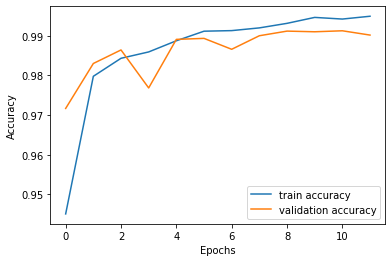

In [ ]:
#Plot accuracy
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(loc = 'lower right')

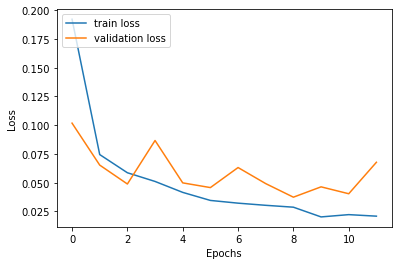

In [ ]:
#Plot loss
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(loc = 'upper left')

#### Data Augmentation

In [ ]:
#Get augmented data
augmented_data = get_augmented_data(X_train, y_train, zoom_range = 0.2)

#Fit augmented data
history = cnn_model.fit(augmented_data, validation_data = (X_val, y_val), steps_per_epoch = (X_train.shape[0]//batch_size),
                    validation_steps = (X_val.shape[0]//batch_size), epochs = epochs, batch_size = batch_size, callbacks = [early_stop])

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/12
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0208 - accuracy: 0.9950 - val_loss: 0.0551 - val_accuracy: 0.9908
Epoch 2/12
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0155 - accuracy: 0.9962 - val_loss: 0.0511 - val_accuracy: 0.9919
Epoch 3/12
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0165 - accuracy: 0.9961 - val_loss: 0.0593 - val_accuracy: 0.9901
Epoch 4/12
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0160 - accuracy: 0.9961 - val_loss: 0.0535 - val_accuracy: 0.9926
Epoch 5/12
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0127 - accuracy: 0.9964 - val_loss: 0.0534 - val_accuracy: 0.9912
Epoch 6/12
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0104 - accuracy: 0.9974 - val_loss: 0.0653 - val_accuracy: 0.9906
Epoch 7/12
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0143 - accuracy: 0.9967 - val_loss: 0.0461 - val_accuracy:

In [ ]:
#Get augmented data
augmented_data = get_augmented_data(X_train, y_train, width_shift_range=0.1, height_shift_range=0.1, 
                                                                 horizontal_flip=True)

#Fit augmented data
history = cnn_model.fit(augmented_data, validation_data = (X_val, y_val), steps_per_epoch = (X_train.shape[0]//batch_size),
                    validation_steps = (X_val.shape[0]//batch_size), epochs = epochs, batch_size = batch_size, callbacks = [early_stop])

Epoch 1/12
  33/1500 [..............................] - ETA: 6s - loss: 0.0153 - accuracy: 0.9962

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1500/1500 [==============================] - 8s 5ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.0599 - val_accuracy: 0.9917
Epoch 2/12
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0112 - accuracy: 0.9975 - val_loss: 0.0474 - val_accuracy: 0.9937
Epoch 3/12
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0109 - accuracy: 0.9975 - val_loss: 0.0604 - val_accuracy: 0.9923
Epoch 4/12
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0108 - accuracy: 0.9976 - val_loss: 0.0550 - val_accuracy: 0.9927
Epoch 5/12
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0108 - accuracy: 0.9976 - val_loss: 0.0498 - val_accuracy: 0.9925


## Predictions

In [ ]:
#ANN Predictions
ann_predictions = ann_model.predict(X_test).argmax(axis = 1)

In [ ]:
#CNN Predictions
cnn_predictions = cnn_model.predict(X_test).argmax(axis = 1)

## Compare results

#### ANN

In [ ]:
#Evaluate ANN model
ann_model.evaluate(X_test, y_test, batch_size = batch_size)


313/313 [==============================] - 1s 2ms/step - loss: 0.1032 - accuracy: 0.9832


[0.10321573168039322, 0.9832000136375427]


Confusion matrix for the ANN Model:



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

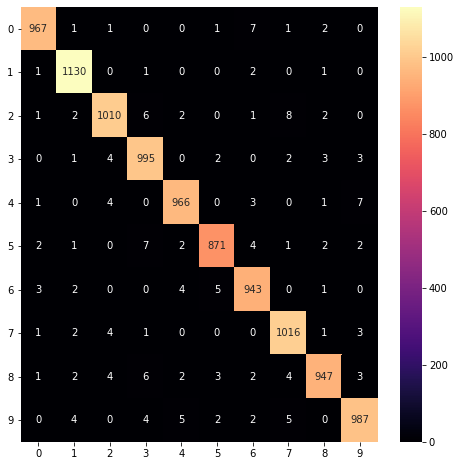

In [ ]:
#Create a confusion matrix with the results from the predictions
print("\nConfusion matrix for the ANN Model:\n")
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix(y_test, ann_predictions), annot = True, fmt='d', cmap = 'magma',
            xticklabels = target_labels, yticklabels = target_labels)
plt.yticks(rotation = 0) 

In [ ]:
#Classification report
print("Classification report for the ANN Model\n\n",classification_report(y_test, ann_predictions))

Classification report for the ANN Model

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### CNN

In [ ]:
#Evaluate CNN model
cnn_model.evaluate(X_test, y_test, batch_size = batch_size)

313/313 [==============================] - 1s 2ms/step - loss: 0.0364 - accuracy: 0.9933


[0.03642261028289795, 0.9933000206947327]


Confusion matrix for the CNN Model:



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

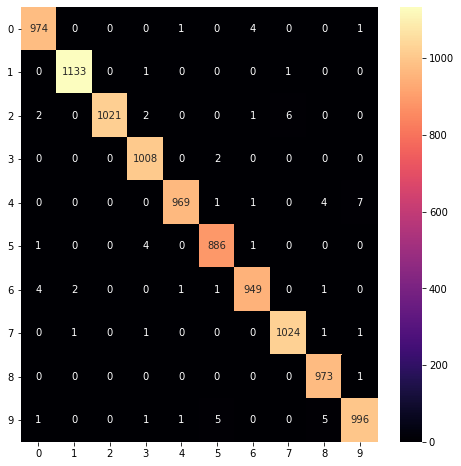

In [ ]:
#Create a confusion matrix with the results from the predictions
print("\nConfusion matrix for the CNN Model:\n")
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix(y_test, cnn_predictions), annot = True, fmt='d', cmap = 'magma',
            xticklabels = target_labels, yticklabels = target_labels)
plt.yticks(rotation = 0) 

In [ ]:
#Classification report
print("Classification report for the CNN Model\n\n", classification_report(y_test, ann_predictions))

Classification report for the CNN Model

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Check some predictions of the CNN model

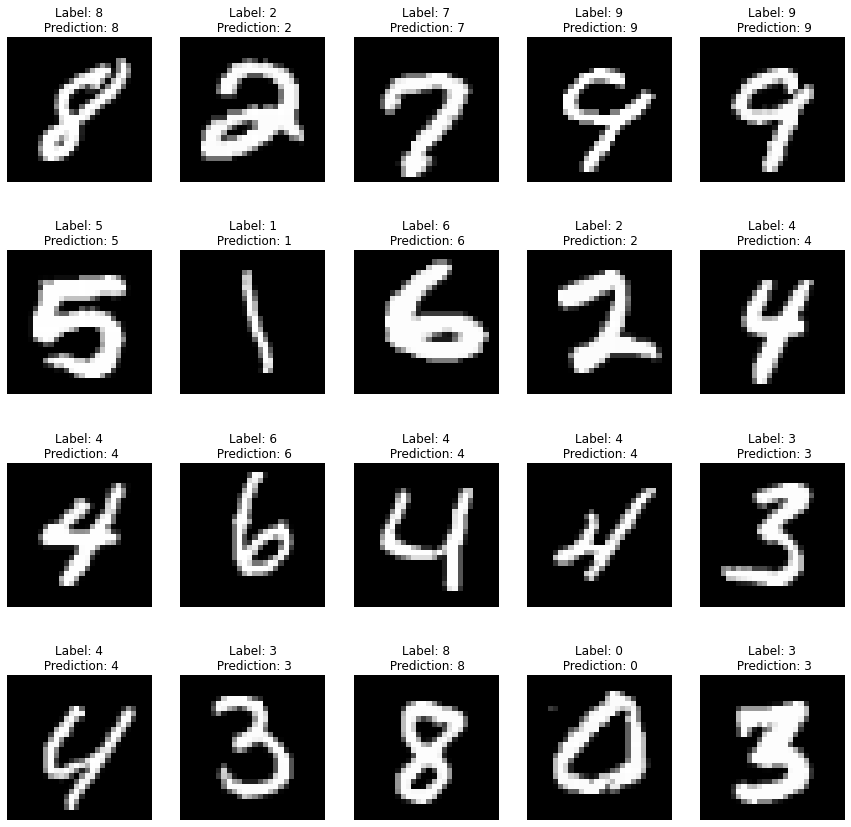

In [ ]:
#Reshape data back to the original shape
X_test = X_test.reshape(X_test.shape[0], 28, 28)

#Display some samples and the prediction for each sample
rows = 4
columns = 5

fig, axes = plt.subplots(rows, columns, figsize=(15,15))
axes = axes.ravel()

random_indexes = np.random.randint(low = 0, high = y_test.shape[0], size = rows*columns)

for index in range(0, rows*columns): 
  axes[index].axis('off')
  axes[index].imshow(X_test[random_indexes[index]], cmap = 'gray')
  axes[index].set_title("Label: {}\n Prediction: {}".format(target_labels[int(y_test[random_indexes[index]])], target_labels[int(cnn_predictions[random_indexes[index]])]))